In [1]:
#  Importing all the necessary libraries for EDA
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib
import xgboost as xgb
import mrmr
import sklearn
import scipy

libraries = {
    'pandas': pd,
    'numpy': np,
    're': re,
    'seaborn': sns,
    'matplotlib': matplotlib,
    'xgboost': xgb,
    'mrmr': mrmr,
    'sklearn': sklearn,
    'scipy': scipy
}

for lib, module in libraries.items():
    try:
        print(f'{lib} version: {module.__version__}')
    except AttributeError:
        print(f'{lib} does not have a __version__ attribute')


pandas version: 1.5.3
numpy version: 1.24.3
re version: 2.2.1
seaborn version: 0.12.2
matplotlib version: 3.7.1
xgboost version: 1.7.6
mrmr version: 0.2.8
sklearn version: 1.3.1
scipy version: 1.10.1


In [3]:
# For mrmr algorithm
!pip install xgboost
!pip install mrmr_selection
from mrmr import mrmr_regression

In [4]:
df = pd.read_csv('./CancerCell2022_AZD4547_PRISM.csv')

# Pre-Processing

In [5]:
df_num = df.rename(columns = {"Row" : "Cell line"})
df_num.head()

,Cell line,P37108,Q96JP5,Q9Y4H2,P36578,Q6SPF0,O76031,Q8WUQ7,A6NIH7,Q9BTD8,...,Q5EBL4,P49715,Q5TA45,O14924,Q7Z3B1,O60669,Q13571,Q96JM2,P35558,AUC
0,ACH_000007,70.813376,10.397105,7.838241,245.716342,6.361293,33.219996,0.072112,3.190716,10.932641,...,0.016581,0.047859,6.687097,0.196153,0.010548,0.036507,0.015176,0.006032,0.090045,1.750872
1,ACH_000012,45.885932,0.219851,0.038735,95.065502,0.207778,43.659388,0.006217,0.020412,5.581528,...,0.007198,0.024734,0.156403,0.019394,0.146396,0.067847,0.011204,3.053069,0.005197,0.935781
2,ACH_000015,97.156593,0.081679,0.000352,223.416202,16.762669,18.645040,0.000067,4.820324,9.788311,...,1.034375,0.001502,0.084437,0.002895,0.003559,0.000073,0.000333,0.003592,0.047362,0.534410
3,ACH_000018,88.962782,16.162629,0.045823,167.838514,8.445893,18.903743,0.131190,0.194669,12.278054,...,7.930270,0.023918,0.096784,0.000795,6.919319,0.007905,0.007362,0.061330,0.010841,1.034731
4,ACH_000019,66.102366,0.597581,0.015659,109.146344,31.741095,48.016222,0.011203,0.210224,9.051519,...,0.043006,0.008505,0.006465,0.131165,0.013341,0.319023,0.021714,0.319655,0.005729,1.125705


In [6]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Columns: 6694 entries, Cell line to AUC
dtypes: float64(6693), object(1)
memory usage: 17.2+ MB


In [7]:
df_num.shape

(336, 6694)

In [8]:
df_num.describe()

,P37108,Q96JP5,Q9Y4H2,P36578,Q6SPF0,O76031,Q8WUQ7,A6NIH7,Q9BTD8,Q9P258,...,Q5EBL4,P49715,Q5TA45,O14924,Q7Z3B1,O60669,Q13571,Q96JM2,P35558,AUC
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,...,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,316.000000
mean,83.632686,8.132749,1.612748,165.098821,7.324946,27.114742,0.189598,1.775281,9.808136,27.973037,...,1.240473,0.144017,2.032112,0.045536,1.913719,0.275918,0.191160,1.100034,0.148420,1.134279
std,29.891380,7.421937,3.918123,58.046652,6.224560,8.481621,0.620918,3.011331,4.614911,16.813902,...,2.328798,1.186001,2.556285,0.074635,8.548713,0.867393,1.950420,3.015122,1.419955,0.315410
min,18.871144,0.000718,0.000098,52.138602,0.000620,10.493471,0.000013,0.000011,0.040632,0.069447,...,0.000007,0.000010,0.000180,0.000053,0.000045,0.000073,0.000055,0.000015,0.000013,0.338146
25%,62.239132,0.275456,0.017404,121.851906,0.405916,21.022005,0.006469,0.036925,7.431593,16.389482,...,0.016313,0.002123,0.124073,0.003509,0.014008,0.008036,0.003709,0.012116,0.003662,0.966610
50%,79.570693,8.710873,0.090736,155.594197,7.207347,26.255362,0.019869,0.145832,9.671402,24.696971,...,0.099807,0.010368,0.390519,0.012956,0.060061,0.029092,0.013213,0.053802,0.014366,1.124157
75%,98.694273,14.224514,0.338013,204.194463,10.821920,31.544788,0.072420,2.940327,12.188851,35.202931,...,0.691962,0.042255,3.963219,0.057607,0.194484,0.100857,0.040940,0.181367,0.046769,1.276990
max,200.868844,32.906028,35.842019,349.992452,33.367692,72.999769,5.123537,15.263035,41.350131,125.504910,...,13.098593,15.653247,12.126993,0.477900,98.808962,6.020820,33.304149,14.663321,23.467301,2.692889


In [9]:
# For categorical variables
df_num.describe(include=['O'])

,Cell line
count,336
unique,336
top,ACH_000007
freq,1


## 1. Missing Values

In [10]:
# Checking for columns with NaN values (Missing Values)
[features for features in df_num.columns if df_num[features].isna().sum()>0]

['AUC']

**AUC** is the target columns and has null values

In [11]:
# Checking the number of missing values in AUC
df_num['AUC'].isna().sum()

20

In [12]:
# Deleting rows with NaN
df_num = df_num.dropna()

In [13]:
df_num.isna().sum()

Cell line    0
P37108       0
Q96JP5       0
Q9Y4H2       0
P36578       0
            ..
O60669       0
Q13571       0
Q96JM2       0
P35558       0
AUC          0
Length: 6694, dtype: int64

In [14]:
# Checking for duplicate rows in the dataset
df_num.duplicated().any()

False

In [15]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 0 to 335
Columns: 6694 entries, Cell line to AUC
dtypes: float64(6693), object(1)
memory usage: 16.1+ MB


In [16]:
df_num.drop(["Cell line"], axis = 1, inplace = True)

In [17]:
df_num.head()

,P37108,Q96JP5,Q9Y4H2,P36578,Q6SPF0,O76031,Q8WUQ7,A6NIH7,Q9BTD8,Q9P258,...,Q5EBL4,P49715,Q5TA45,O14924,Q7Z3B1,O60669,Q13571,Q96JM2,P35558,AUC
0,70.813376,10.397105,7.838241,245.716342,6.361293,33.219996,0.072112,3.190716,10.932641,45.035788,...,0.016581,0.047859,6.687097,0.196153,0.010548,0.036507,0.015176,0.006032,0.090045,1.750872
1,45.885932,0.219851,0.038735,95.065502,0.207778,43.659388,0.006217,0.020412,5.581528,14.606818,...,0.007198,0.024734,0.156403,0.019394,0.146396,0.067847,0.011204,3.053069,0.005197,0.935781
2,97.156593,0.081679,0.000352,223.416202,16.762669,18.645040,0.000067,4.820324,9.788311,79.471739,...,1.034375,0.001502,0.084437,0.002895,0.003559,0.000073,0.000333,0.003592,0.047362,0.534410
3,88.962782,16.162629,0.045823,167.838514,8.445893,18.903743,0.131190,0.194669,12.278054,31.235398,...,7.930270,0.023918,0.096784,0.000795,6.919319,0.007905,0.007362,0.061330,0.010841,1.034731
4,66.102366,0.597581,0.015659,109.146344,31.741095,48.016222,0.011203,0.210224,9.051519,24.654003,...,0.043006,0.008505,0.006465,0.131165,0.013341,0.319023,0.021714,0.319655,0.005729,1.125705


## 2. Bootstrapping


In [18]:
from sklearn.utils import resample

In [19]:
def bootstrap_data(dataset):
    print("Bootstrapping dataset")
    return resample(dataset, replace = True, n_samples = len(dataset))

## 3. K-Fold CV

Setting up K Fold to be used later in Grid Search CV

In [20]:
from sklearn.model_selection import KFold

## 4. Normalizing the Dataset

In [21]:
from sklearn.preprocessing import StandardScaler

# Defining a function to normalize the dataset

def norm(data):
    """
    The function takes a pandas dataset as input and returns a normalized pandas dataset (using Standard Scaler) as output
    """
    print(">Normalizing dataset")
    # Initializing Standard Scaler for normalizing dataset
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data)
    
    return pd.DataFrame(normalized_data, columns = data.columns)

## 5. Feature Selection

## Filter methods

### 1. Pearson's Correlation (Linear Correlation)

Our objective is to find all features with p_value <0.05 and high correlation (negative and positive) with respect to the target value,  **AUC**

In [22]:
from scipy.stats import pearsonr

In [23]:
def corr_pearson(X, y):
    """
    This function takes the dataframe and the target variable as the input arguments and forms a dictionary with the features as keys
    and the corresponding correlation and p values as values. It then converts the dictionary into a pandas dataframe and returns only 
    those features with p_value < 0.05 as function output.
    """
    print(">Feature selection using Pearson correlation")
    
    corr_n_p = {}

    for column in X:
        # pearsonr returns a tuple (Pearson's correlation coefficient, 2-tailed p-value)
        corr, p_value = pearsonr(X[column], y)
        corr_n_p[column] = (corr, p_value)

    correlation_df = pd.DataFrame.from_dict(corr_n_p, orient='index', columns=['correlation', 'p_value'])
    
    # Reset the index to move the current index (genes) as a proper column
    correlation_df.reset_index(inplace=True)
    # Rename the column to 'genes'
    correlation_df.rename(columns={'index': 'genes'}, inplace=True)
    
    # Plotting the graph of correlation vs p-value
    plt.figure(figsize=(4, 3))
    sns.scatterplot(data=correlation_df, x='correlation', y='p_value', alpha=0.6, edgecolor=None)
    plt.axhline(y=0.05, color='r', linestyle='--')
    plt.title('Correlation vs P-Value')
    plt.xlabel('Correlation')
    plt.ylabel('P-Value')
    plt.show()
    
    # Filtering and sorting the significant features
    significant_df = correlation_df[correlation_df.p_value < 0.05].sort_values(by='p_value', ascending=True)
    
    significant_df.reset_index(inplace=True)
    significant_df.drop(columns="index", inplace=True)
    
    # Filtering out the significant features from the actual dataset
    features = list(significant_df.genes)
    
    return features

### 3. MRMR (Maximum Relevance and Minimum Redundancy)

In [24]:
# Defining a function to implement mRMR feature selection
def mrmr_feature_selection(X,y,k):
    # the different column types in the dataset
    print(">Implementing MRMR feature selection")
    return mrmr_regression(X =X, y= y, K = k)

### 4. F-regression (F-statistic and p-values)

In [25]:
from sklearn.feature_selection import f_regression, SelectKBest

In [26]:
# Defining a function to implement F-regression
def f_reg_feature_selection(X, y, k):
    print(">Implementing F-regression for feature selection")
    # Using SelectKBest to select the best features
    selector = SelectKBest(f_regression, k = k)
    new = selector.fit_transform(X,y)
    
    f_selected = X.columns[selector.get_support()].to_list()
    
    return f_selected

## Embedded Feature Selection

In [27]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

In [28]:
def lasso_cv(X,y):
    print(">Implementing Lasso regularization for feature selection")
    
    # Initializing an array of different values for alpha
    alphas = np.logspace(-4,4,50)
    
    # Ensure X and y have matching indices
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    # Use LassoCV to find the best alpha using CV
    lassocv = LassoCV(alphas = alphas, cv = 5)
    lassocv.fit(X,y)
    
    best_alpha = lassocv.alpha_
    print(f"    best alpha value: {best_alpha}")
    
    # Using the best alpha to implemene Lasso Regularization
    lasso = Lasso(alpha=best_alpha)

    # Fit the Lasso model
    lasso.fit(X, y)

    # Identify features with non-zero coefficients
    lasso_features = np.where(lasso.coef_ != 0)[0]
    
    return lasso_features

## Model Fitting and GridSearchCV

In [29]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.svm import SVR
import xgboost as xgb

In [30]:
# XGBoost
def xgb_regressor(X,y):
    
    xgb_results = {}
    print('Fitting XGBoost Model')
    # Create a XGBoost Regressor object
    xgbr = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0, n_jobs=-1)
    
    # Param grid for XGBoost
    param_grid_xgb = {
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'reg_lambda': [0.2, 0.5, 0.8, 1, 1.2],
    'reg_alpha': [0, 0.2, 0.5, 0.8, 1],
    'n_estimators': [100, 150, 200, 250, 300],
    'min_child_weight': [1, 2, 3, 4],
    'max_depth': [5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}


    model = xgb.XGBRegressor()

    kf = KFold(n_splits=6, shuffle=True, random_state=42)

    grid_search = RandomizedSearchCV(model, param_grid_xgb, cv=kf, verbose=1)
    
    grid_search.fit(X,y)
    
    print(f"XGBoost Best Parameters: {grid_search.best_params_}")
    print(f"XGBoost Best Score: {grid_search.best_score_}")
    
    xgb_results['best_params'] = grid_search.best_params_
    xgb_results['best_score'] = grid_search.best_score_
    
    return xgb_results

In [31]:
# SVM

def svmachine(X,y):
    
    svm_results = {}
    
    print('Fitting Support Vector Machine Model')
    
    # Param grid for SVM
    param_grid_svm = {
    'shrinking': [True, False],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
    'epsilon': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1],
    'degree': [2, 3, 4, 5, 6],
    'coef0': [-1, -0.5, 0, 0.5, 1, 1.5],
    'C': [0.1, 0.5, 1, 5, 10, 25, 50, 100]}
    
    model = SVR()

    kf = KFold(n_splits=6, shuffle=True, random_state=42)

    grid_search = RandomizedSearchCV(model, param_grid_svm, cv=kf, verbose=1, n_jobs=-1)
    
    grid_search.fit(X, y)
    
    print(f"SVM Best Parameters: {grid_search.best_params_}")
    print(f"SVM Best Score: {grid_search.best_score_}")
    
    svm_results['best_params'] = grid_search.best_params_
    svm_results['best_score'] = grid_search.best_score_
    
    return svm_results

In [32]:
# MLP (Neural Network)

from sklearn.neural_network import MLPRegressor

def mlp_regressor(X,y):
    
    mlp_results = {}
    
    # Param Grid for MLP
    param_grid_mlp = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (50, 50, 50), (150, 150), (100, 100, 100), (50, 50, 50, 50)],
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
    'learning_rate_init': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05],
    'max_iter': [50, 100, 200, 300, 400, 500],
    'momentum': [0.1, 0.5, 0.7, 0.9, 0.95],
    'beta_1': [0.7, 0.8, 0.9, 0.95],
    'beta_2': [0.99, 0.995, 0.999]}

    
    print('Fitting Multi-Layer Perceptron Model (Neural Network)')
    
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    
    # Initialize MLPRegressor and GridSearchCV
    mlp = MLPRegressor(max_iter=1000) # You might want to increase max_iter if the model doesn't converge
    grid_search = RandomizedSearchCV(mlp, param_grid_mlp, n_jobs=-1, cv=kf, verbose=1)

    # Fit the model
    grid_search.fit(X, y)
    
    print(f"MLP Best Parameters: {grid_search.best_params_}")
    print(f"MLP Best Score: {grid_search.best_score_}")
    
    mlp_results['best_params'] = grid_search.best_params_
    mlp_results['best_score'] = grid_search.best_score_
    
    return mlp_results

In [33]:
# Defining a function to fit models
def model_fitting(X, y):
    print(">Fitting models")
    
    results = {}
    scores = []
    model_names = []
    
    # Cross validation object
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    print('-- Fitting models on default parameters...')
    models = {
        'SVM': SVR(),
        'MLP': MLPRegressor(),
        'XGBoost': xgb.XGBRegressor()
    }
    
    for name, model in models.items():
        
        cv_score_list = cross_val_score(model, X, y, cv = kf)
        results[f'{name}'] = (np.mean(cv_score_list)) 
    
    # Selecting the models with the best scores on default values
    sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
    top_2_keys = [sorted_results[i][0] for i in range(2)]
    
    tuning_models = {}
    
    print(f'--Top 2 models on default parameters:{top_2_keys}')
    print('-- Hyperparameter tuning the models')
    for mod in  top_2_keys:
        if mod == 'SVM':
            svm_results = svmachine(X, y)
            tuning_models['SVM'] = svm_results
        elif mod == 'MLP':
            mlp_results = mlp_regressor(X, y)
            tuning_models['MLP'] = mlp_results
        elif mod == 'XGBoost':
            xgb_results = xgb_regressor(X, y)
            tuning_models['XGBoost'] = xgb_results
    
    tuning_results = {}
    scores = []
    model_names = []
    
    for name, model in tuning_models.items():
        
        tuning_results[f'{name}_score'] = (model['best_score'], model['best_params'])
        # for plotting
        scores.append(model['best_score'])
        model_names.append(name)
            
    # Plotting the scores
    plt.figure(figsize=(3, 2))
    plt.barh(model_names, scores, color=['blue', 'red', 'green', 'yellow'])
    plt.xlabel('Best Score')
    plt.title('Model Performance')
    plt.gca().invert_yaxis()  # To display the model with the lowest MSE at the top
    plt.show()
    
    print("....Model Fitting Done")
    top2 = sorted(tuning_results.items(), key=lambda x: x[1][0], reverse=True)[:2]
    print(top2)
    return top2


## Forward Feature Selection and Backward Feature Elimination

In [34]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

In [35]:
def forward_backward_selection(X, y, top2_models):
    """
    This function performs forward feature selection and backward feature elimination on the dataset
    for the top 2 models and returns the selected features for each model and method.
    """
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    
    # Initializing dictionary to store results
    final_features = {}
    results = {}
    forward_counts = []
    backward_counts = []
    model_names = []
    
    
    # Extracting the best estimator from the models' results
    best_model = top2_models[0][0].split('_')[0]
    print(best_model)
    
    for model_name, (score, params) in top2_models[:1]:
        if 'MLP' in model_name.upper():
            model = MLPRegressor(**params)
        
        elif 'SVM' in model_name.upper():
            model = SVR(**params)

        elif 'XGBOOST' in model_name.upper():
            model = xgb.XGBRegressor(**params)

        else:
            raise ValueError(f'Unknown Model name: {model_name}')

        # Forward Feature Selection
        print(f">Running Forward Feature Selection for {model_name}")

        # Forward Selection
        sfs_forward = SequentialFeatureSelector(model, direction='forward', cv=kf, n_features_to_select=20, n_jobs=-1)
        sfs_forward.fit(X, y)
        forward_features = X.columns[sfs_forward.get_support()]
        print(f'Forward features:{forward_features}')
        
        print(f">Running Backward Feature Selection for {model_name}")
        # Backward Selection
        sfs_backward = SequentialFeatureSelector(model, direction='backward', cv=kf, n_features_to_select=20, n_jobs=-1)
        sfs_backward.fit(X, y)
        backward_features = X.columns[sfs_backward.get_support()]
        print(f'Backward features:{backward_features}')


        # Store results
        results[model_name.split('_')[0] + "_forward"] = forward_features,
        results[model_name.split('_')[0] + "_backward"] = backward_features
    
    print(results)
    return results


# Final Pipeline

In [36]:
def pipeline(dataset, n_bootstraps):
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    
    # DataFrame to store the results for each bootstrap iteration
    results_df = pd.DataFrame(columns=['Bootstrap Iteration Count', 'Best Model',
                                       'Best Model Forward Features', 'Best Model Backward Features','Best Model Score'])
    
    # Iterator for bootstraps
    count = 1
    
    # Create the csv file with headers if it doesn't exist
    csv_file = 'bootstrap_final.csv'
    
    if not os.path.exists(csv_file):
        results_df.to_csv(csv_file, index = False)
    
    for _ in range(n_bootstraps):
        print("Bootstrapped sample {} of {}".format(count, n_bootstraps))
        
        # Bootstrapping
        bootstrapped_data = bootstrap_data(dataset)
        
        # Train and test
        X = bootstrapped_data.drop(columns=['AUC'])
        y = bootstrapped_data['AUC']
        X = X.reset_index(drop=True)
        y = y.reset_index(drop=True)
        # Normalizing
        X_normalized = norm(X)
        
        # Feature Selection
        # Pearson
        pearson_features = corr_pearson(X_normalized, y)
        
        if len(pearson_features)>500:
            # MRMR
            mrmr_features = mrmr_feature_selection(X_normalized[pearson_features], y, 500)
            # F-regression
            f_features = f_reg_feature_selection(X_normalized[pearson_features], y, 500)
            # Common between mrmr and f-regression
            common_features = list(set(mrmr_features) & set(f_features))
            print("    Number of common features between mrmr and f-regression:{}".format(len(common_features)))
            
        else:
            common_features = pearson_features
        
        common_features_df = pd.DataFrame(common_features)
        # Write the DataFrame to a CSV file
        common_features_df.to_csv('./filter_fs_df.csv', index=False)
        # Lasso
        embedded_features_indices = lasso_cv(X_normalized[common_features], y)
        embedded_features = X_normalized.columns[embedded_features_indices].to_list()
        
        embedded_df = pd.DataFrame(embedded_features)
        # Write the DataFrame to a CSV file
        embedded_df.to_csv('./embedded_df.csv', index=False)
        
        print("    Number of common features left after Lasso:{}".format(len(embedded_features)))
        
        # Model Selection
        top2_models = model_fitting(X_normalized[embedded_features], y)
        
        
        # Extracting model names
        best_model_name = top2_models[0][0].split('_')[0]  # Extracting the model name from the result tuple
        best_model_r2 = top2_models[0][1][0]
        print(f"    The best model is {best_model_name} with R2 score of {best_model_r2}")
        
        if len(embedded_features)>20: # We are trying to filter out the best 20 features
            # FFS, BFE
            final_features = forward_backward_selection(X_normalized[embedded_features], y, top2_models)

            # Extracting forward and backward features for best and second best models
            best_model_forward_features = final_features.get(best_model_name + "_forward", [])
            best_model_backward_features = final_features.get(best_model_name + "_backward", [])
            
        else:
            best_model_forward_features = embedded_features
            best_model_backward_features = embedded_features
        
        
        # Appending the results to the results dataframe
        new_result = {
            'Best Model': best_model_name,
            'Best Model Forward Features': best_model_forward_features,
            'Best Model Backward Features': best_model_backward_features,
            'Best Model Score': best_model_r2}
        
        results_df = results_df.append(new_result, ignore_index=True)
        
        # Appending to df in the .csv file
        pd.DataFrame([new_result]).to_csv(csv_file, mode = 'a', header=False, index=False)
        
        print(results_df)
        print('Data appended to', csv_file)
        print("----------------------------------------------------------\n")
        count+=1
        
    return results_df

Bootstrapped sample 1 of 1
Bootstrapping dataset
>Normalizing dataset
>Feature selection using Pearson correlation


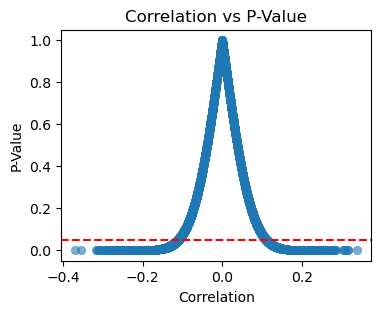

>Implementing MRMR feature selection


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [03:25<00:00,  2.44it/s]


>Implementing F-regression for feature selection
    Number of common features between mrmr and f-regression:349
>Implementing Lasso regularization for feature selection


In [ ]:
results_df = pipeline(df_num, 1)